In [65]:
import imp
import examples.models.romo as romo
import pycog
import numpy as np
import matplotlib.pyplot as plt
from jedi import jedi
from ipywidgets import interact, fixed
from sklearn.decomposition import PCA
from jedi.utils import plot, seedutil, func_generator, init_tools

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [18]:
reload(pycog)

<module 'pycog' from '/Users/simonhaxby/Code/Python/pycog/pycog/__init__.pyc'>

In [19]:
romo

<module 'examples.models.romo' from '/Users/simonhaxby/Code/Python/pycog/examples/models/romo.pyc'>

In [20]:
rng = np.random.RandomState(2)

In [21]:
params = {
    'callback_results': None,
    'target_output':    True,
    'minibatch_index':  1,
    'best_costs':       None,
    'name':             "gradient"
    }

In [22]:
trials = [romo.generate_trial(rng, 10, params) for _
          in range(20)]
trials[0]['epochs']

{'T': 4840.0,
 'decision': (4540.0, 4840.0),
 'delay': (600, 4040.0),
 'f1': (100, 600),
 'f2': (4040.0, 4540.0),
 'fixation': (0, 100)}

In [23]:
len(trials[0]['outputs'][:,1])

484

In [24]:
trials[0].keys()

['info', 'inputs', 'outputs', 'mask', 'epochs', 't']

(-0.5, 1.5)

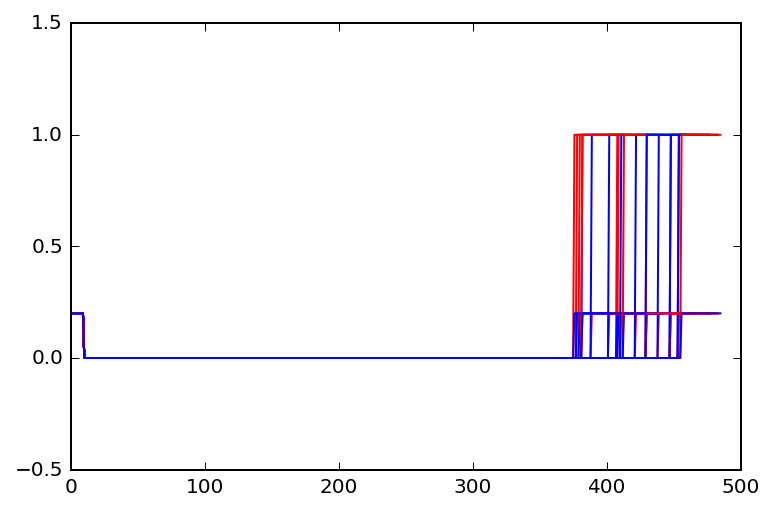

In [26]:
for trial in trials:
    plt.plot(range(len(trial['outputs'][:,1])), trial['outputs'][:,1],'r')
    plt.plot(range(len(trial['outputs'][:,0])), trial['outputs'][:,0], 'b')
plt.ylim(-.5,1.5)

(-0.5, 1.5)

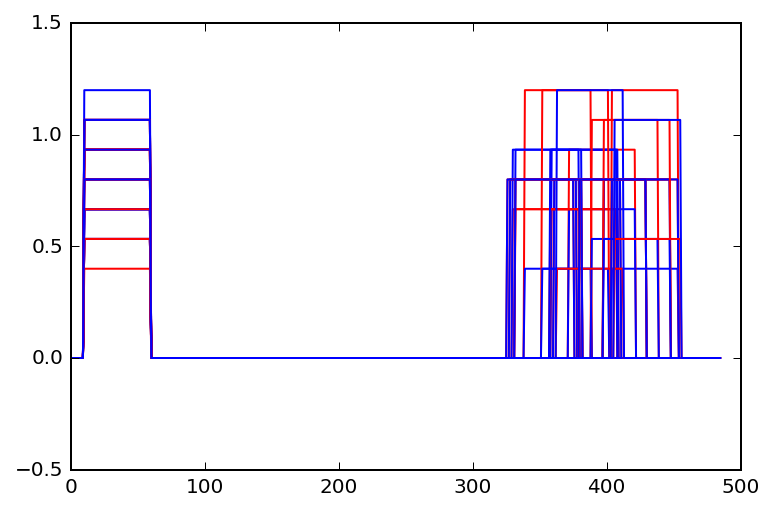

In [27]:
for trial in trials:
    plt.plot(range(len(trial['inputs'][:,1])), trial['inputs'][:,1], 'r')
    plt.plot(range(len(trial['inputs'][:,0])), trial['inputs'][:,0], 'b')
plt.ylim(-.5,1.5)

In [38]:
trial = trials[11]

(-50, 500.0)

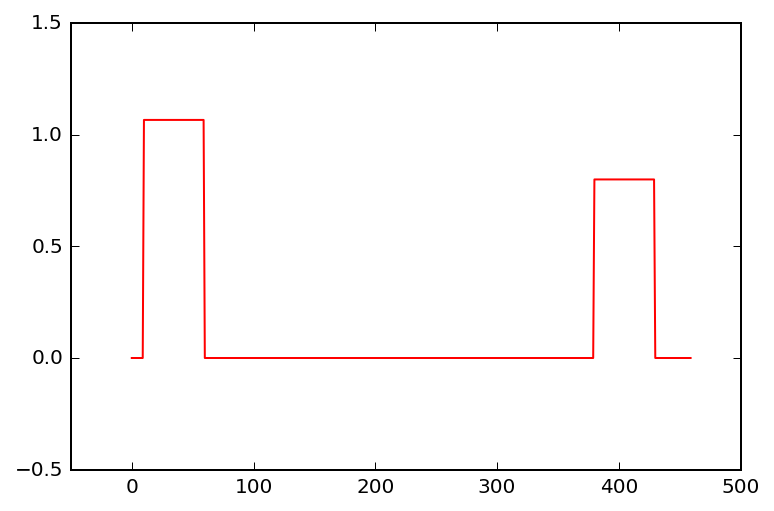

In [39]:
plt.plot(range(len(trial['inputs'][:,1])), trial['inputs'][:,1], 'r')
plt.ylim(-.5,1.5)
plt.xlim(-50,)

(-50, 500.0)

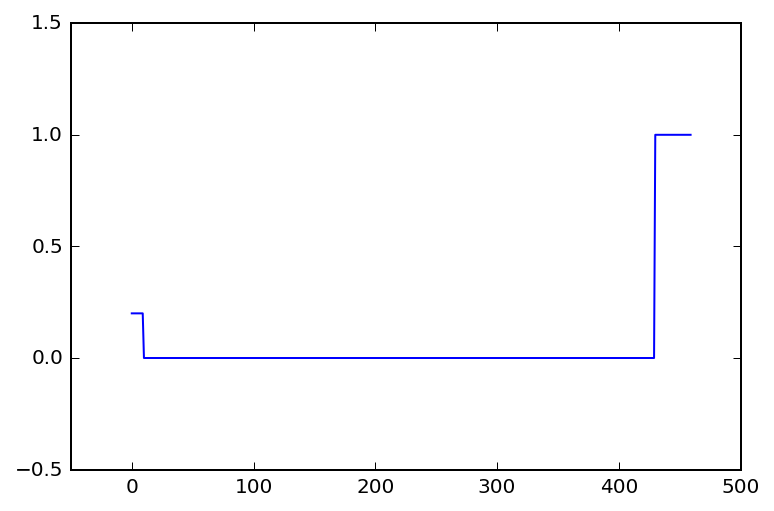

In [40]:
plt.plot(range(len(trial['outputs'][:,1])), trial['outputs'][:,1],'b')
plt.ylim(-.5,1.5)
plt.xlim(-50,)

In [100]:
# simulation parameters for FORCE
dt = .01      # time step
tstart = 0 # learning start time
tstop = 5  # learning stop time
rho = 1.02   # spectral radius of J
N = 100     # size of stochastic pool
lr = 1.0   # learning rate
pE = .8 # percent excitatory
sparsity = (.1,1,1) # sparsity
I = 1

In [108]:
errors = []
wus = []
zs = []
ts = []
w_ = None
seedling = 25

J, Wz, Wi, x0, u, w = init_tools.set_simulation_parameters(seedling, N, I, pE=pE, p=sparsity, rho=rho)

for trial in trials[:5]:
    targets = trial['outputs'][:,1]
    inputs = trial['inputs'][:,1]
    tmax = float(len(targets))/100-.01
    
    if w_ is not None:
        w = w_
        x0 = x[-1]
    
    # inp & z are dummy variables
    def model(t0, x, params):
        i = params['index']
        tanh_x = params['tanh_x']
        z = params['z']
        inp = params['inputs'][i]
        return (-x + np.dot(J, tanh_x) + np.dot(Wi, inp) + Wz*z)/dt
    
    x, t, z, w_, wu, _ = jedi.force(targets, model, lr, dt, tmax, tstart, tstop, x0, w, 
                                    inputs=inputs)

    zs.append(z)
    wus.append(wu)
    ts.append(t)
    
    error = np.abs(z[1:]-np.array(targets))
    errors.append(error)
    
errors = np.array(errors)

Simulation run-time (wall): 0.355 seconds
Simulation run-time (wall): 0.306 seconds
Simulation run-time (wall): 0.333 seconds
Simulation run-time (wall): 0.325 seconds
Simulation run-time (wall): 0.333 seconds


In [109]:
len(wu)

440

In [110]:
k = 0

5


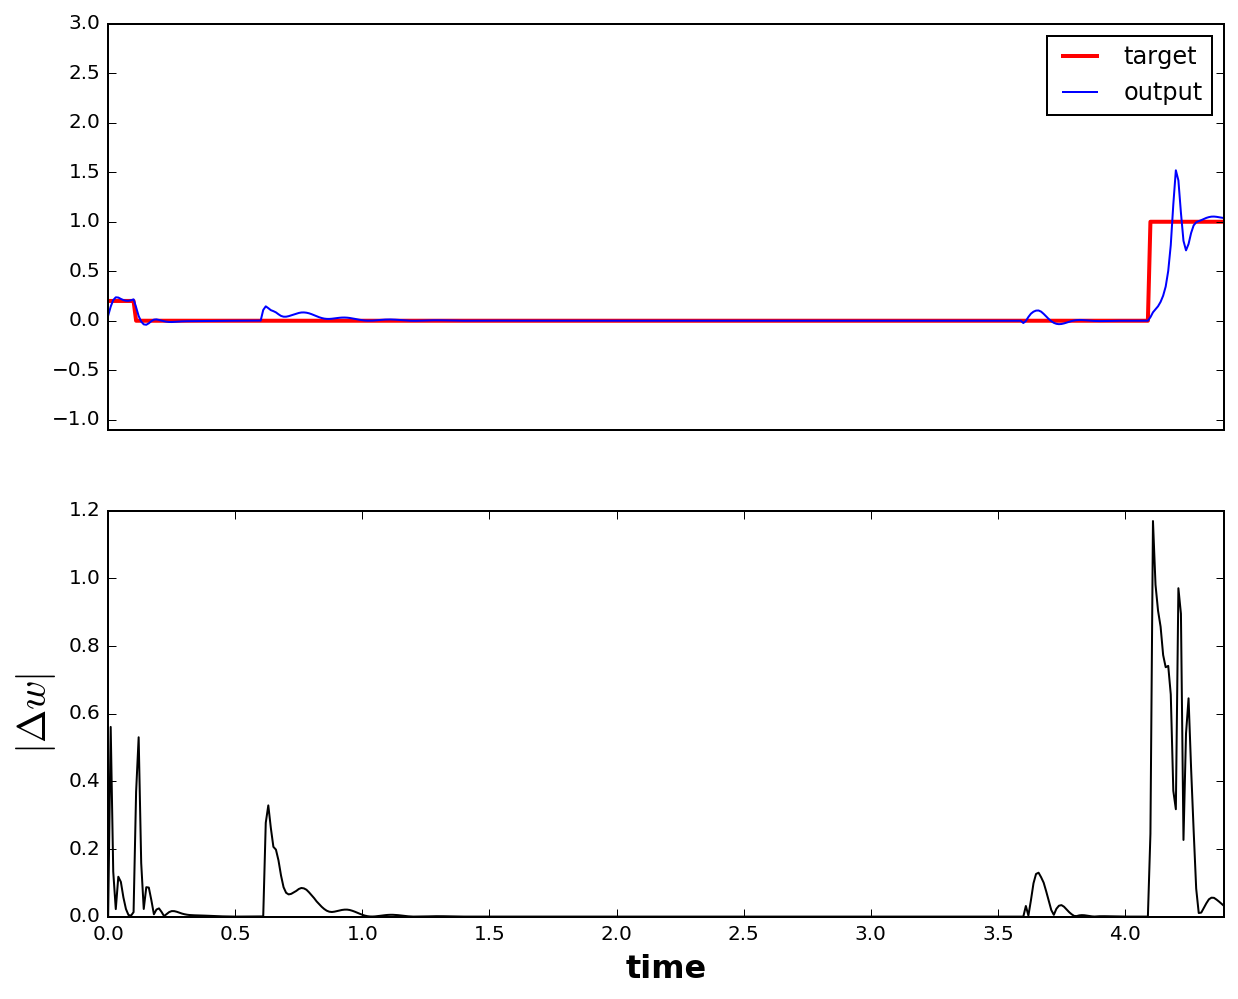

In [116]:
plt.figure(figsize=(10,8))
plot.target_vs_output_plus_error(ts[k], zs[k], wus[k], trials[k]['outputs'][:,1], offset=1, log=False)
k+=1
print(k)

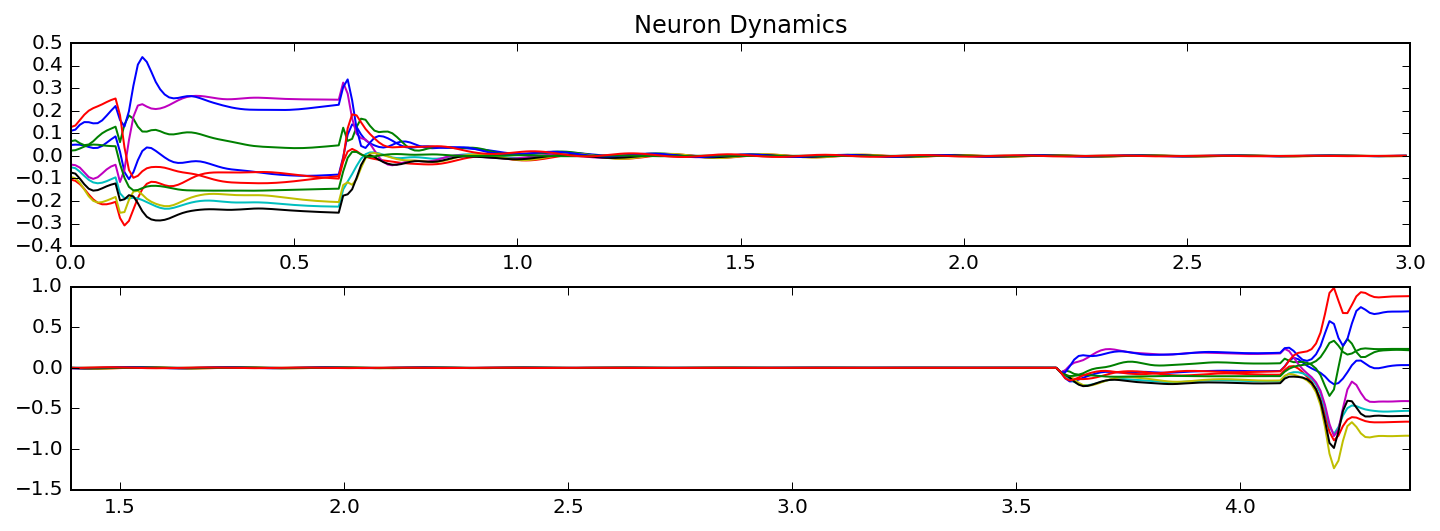

In [107]:
# Visualizing activities of first 20 neurons
T = 300
plt.figure(figsize=(12,4))
plt.subplot(211)
plt.title("Neuron Dynamics");
for i in range(10):
    plt.plot(t[:T], x[:T, i]);
    
plt.subplot(212)
for i in range(10):
    plt.plot(t[-T:], x[-T:, i]);
    plt.xlim(t[-T], t[-1])

In [74]:
pca = PCA(n_components=2)
pca.fit(x)
pca_x = pca.transform(x).T

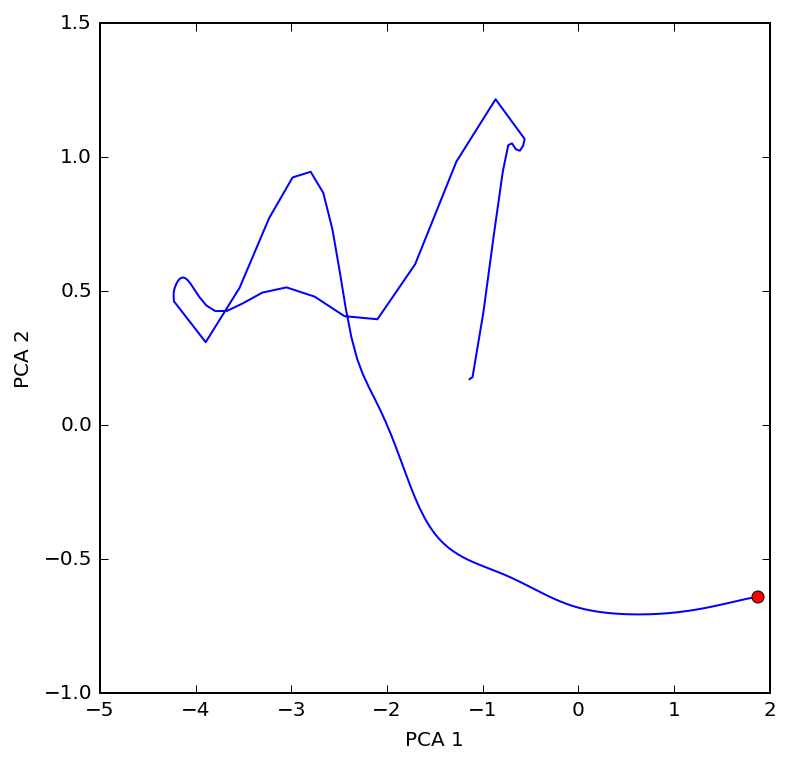

In [75]:
tmax = t[-1]
tmin = t[0]
tv = t[:-1]

interact(plot.visualize_2dim_state, time=(tmin, tmax, .1), pca_x=fixed(pca_x), tv=fixed(tv));